# FashionMnist 

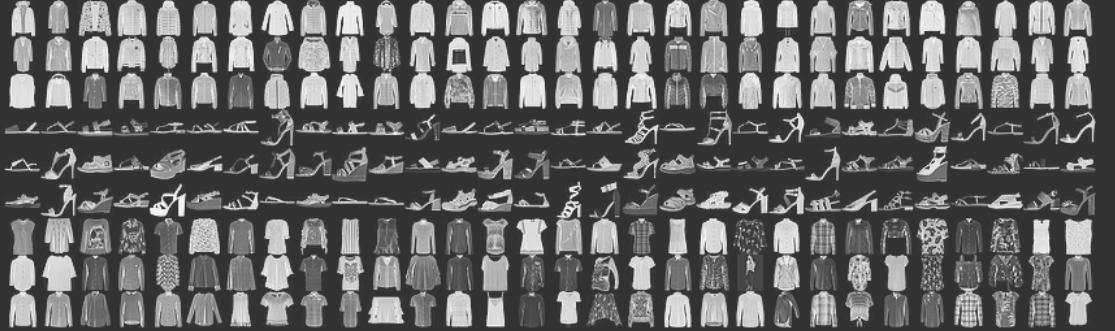

In [287]:
from IPython import display
display.Image("https://peltarion.com/static/fashion-mnist_long.png")

Fashion-MNIST is a dataset of images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Each training and test example is assigned to one of the following labels:

- **0** : T-shirt/top
- **1** : Trouser
- **2** : Pullover
- **3** : Dress
- **4** : Coat
- **5** : Sandal
- **6** : Shirt
- **7** : Sneaker
- **8** : Bag
- **9** : Ankle boot

### Import Libraries

In [288]:
#import the dataset
from keras.datasets import fashion_mnist

#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

#import Preparations for the model
from sklearn.model_selection import train_test_split
#import the model

#ignore warnings of python
import warnings
warnings.filterwarnings('ignore')

In [289]:
# Load the data
data = fashion_mnist.load_data()

In [290]:
# Split the data to training and testing
((train_X, train_Y), (test_X, test_Y)) = data

In [291]:
print("The shape of testing the data :",test_X.shape)
print("The shape of training the data :",train_X.shape)

The shape of testing the data : (10000, 28, 28)
The shape of training the data : (60000, 28, 28)


In [292]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

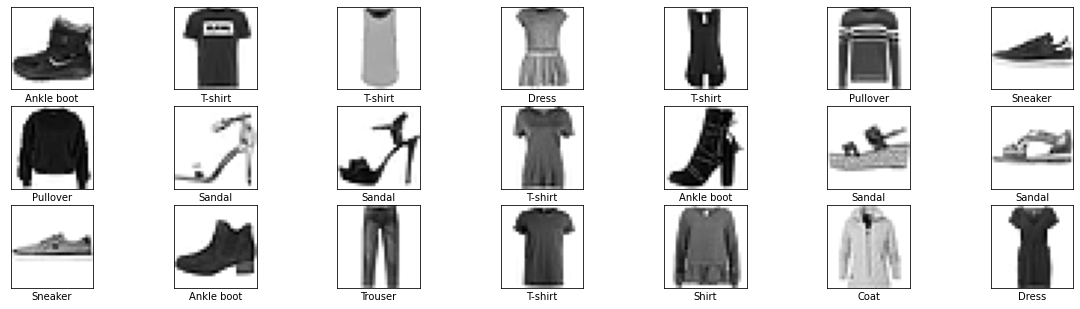

In [309]:
# Plot the first 25 elements from training
plt.figure(figsize=(20,7))
for i in range(21):
    plt.subplot(4,7,i+1)
    plt.imshow(train_X[i], cmap='binary')
    plt.xlabel(class_names[train_Y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [220]:
# Reshape the data 
train_X = train_X.reshape(60000, 28*28)
test_X = test_X.reshape(10000,28*28)

In [221]:
print("The shape of testing the data :",test_X.shape)
print("The shape of training the data :",train_X.shape)

The shape of testing the data : (10000, 784)
The shape of training the data : (60000, 784)


In [222]:
df = pd.DataFrame(train_X)

In [223]:
# Change name of columns
cols = list(df.columns)
df.rename(columns={cols[i]:'Pixel'+str(i) for i in range(len(cols)) } , inplace=True)

In [224]:
# Add label columns
df.insert(len(df.columns), 'fashion_item', train_Y)

In [225]:
print("The shape of training the data :",df.shape)

The shape of training the data : (60000, 785)


In [249]:
df.head(7)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,22,...,0,0,0,133,167,73,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [227]:
df.describe()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883,4.500000
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829,2.872305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000,9.000000


In [228]:
# Check for missing values
df.isnull().sum().sum()

0

In [229]:
# Rename the column׳s label so that it is displayed in the graph as a word and not as a number
df['fashion'] = df['fashion_item'].copy()
k=df['fashion'].replace({0 :'T-Shirt/Top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle Boot'})


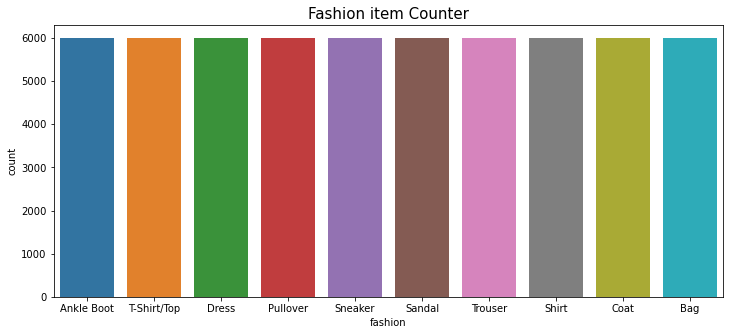

In [230]:
# Plot graph for count values of fashion item
axis=plt.subplots(figsize = (12,5))
plt.title("Fashion item Counter", size=15)
sns.countplot(k)

plt.show()

In [231]:
# Return to original Dataframe
df.drop(['fashion'], axis=1, inplace=True)

In [232]:
#We will divide the data into training and test, since we have already split the data 
#we will test each model in a test from the trainig so that in the end 
#the best model we will use for the real test.

X = df.drop(columns=['fashion_item'])
Y = df['fashion_item']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)
test_X = test_X.copy() 

In [233]:
print("The shape of Testing the data :",X_test.shape)
print("The shape of Training the data :",X_train.shape)
print("The shape of real Testing of the data :",test_X.shape)

The shape of Testing the data : (12000, 784)
The shape of Training the data : (48000, 784)
The shape of real Testing of the data : (10000, 784)


In [234]:
# Calculates the correlation between any two features
corr = df.corr().abs()

In [235]:
corr.sample(5)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel592,0.002867,0.015017,0.008068,0.019328,0.024587,0.027496,0.025529,0.006895,0.009325,0.065387,...,0.126069,0.073118,0.090569,0.287412,0.367266,0.305265,0.130303,0.045118,0.021131,0.354513
Pixel466,0.005052,0.002587,0.002018,0.001250,0.004190,0.000514,0.003853,0.004080,0.005268,0.005515,...,0.098674,0.064616,0.069231,0.090221,0.091525,0.049816,0.008722,0.001662,0.000183,0.158980
Pixel208,0.002276,0.001844,0.008016,0.013777,0.025876,0.038669,0.048239,0.076557,0.126022,0.221664,...,0.189341,0.106377,0.121777,0.178252,0.174432,0.093878,0.005633,0.035020,0.015176,0.546184
Pixel699,0.004454,0.005238,0.000116,0.002682,0.008138,0.003276,0.004699,0.013907,0.026203,0.044905,...,0.033203,0.012829,0.012844,0.021399,0.007028,0.040933,0.114089,0.216725,0.208019,0.169320
Pixel712,0.004072,0.009470,0.015768,0.014964,0.018858,0.022677,0.023662,0.047277,0.081280,0.150424,...,0.358310,0.274428,0.130671,0.055211,0.055066,0.063034,0.062770,0.046712,0.017439,0.387206


In [310]:
# New dataframe that showing the correlation higher than 0.55
corr_threshold  = corr[corr.fashion_item > 0.55]

In [311]:
# We look for the correlation only between the pixels and the fashion item
corr_threshold = corr_threshold.drop(['fashion_item'])

In [312]:
corr_threshold.sample(7)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel443,0.006628,0.004042,0.001391,0.006997,0.013329,0.016041,0.004798,0.024863,0.066404,0.165857,...,0.230935,0.160573,0.021678,0.191876,0.294047,0.254608,0.126962,0.067782,0.023554,0.580475
Pixel96,0.001889,0.002094,0.013666,0.015083,0.024407,0.034334,0.041462,0.065101,0.127359,0.242515,...,0.240349,0.161222,0.188554,0.244957,0.227794,0.126129,0.002747,0.030479,0.015823,0.607564
Pixel72,0.010343,0.005233,0.012536,0.015315,0.018591,0.026742,0.035596,0.064907,0.133864,0.243669,...,0.248013,0.183234,0.211519,0.271751,0.262780,0.174723,0.065172,0.026407,0.004665,0.564514
Pixel557,0.003162,0.016540,0.006851,0.007709,0.013106,0.014129,0.005591,0.035054,0.080907,0.170740,...,0.205532,0.141518,0.156712,0.181436,0.100140,0.052235,0.182785,0.126805,0.042499,0.603595
Pixel73,0.000715,0.001935,0.012625,0.016183,0.019093,0.028039,0.039425,0.068470,0.139909,0.252196,...,0.245653,0.173287,0.179218,0.238435,0.243225,0.175892,0.072268,0.030042,0.006483,0.552241
Pixel97,0.001437,0.000096,0.012973,0.014573,0.025896,0.033922,0.039356,0.061809,0.121916,0.233429,...,0.201664,0.122653,0.170455,0.243658,0.231509,0.135865,0.016848,0.015387,0.008968,0.594234
Pixel471,0.006567,0.003760,0.003044,0.005327,0.009776,0.012880,0.002207,0.027782,0.070129,0.170823,...,0.233985,0.162595,0.007467,0.208940,0.304586,0.254357,0.118244,0.061957,0.024257,0.574451


In [332]:
# Looking for the largest correlation
max_value = corr_threshold['fashion_item'].max()
corr_threshold.loc[corr_threshold['fashion_item'] == max_value]

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel39,0.000839,0.002084,0.016843,0.019952,0.021185,0.03068,0.039138,0.069957,0.150409,0.316208,...,0.241638,0.169638,0.170968,0.211241,0.203406,0.117244,0.000582,0.035141,0.011473,0.67562


In [333]:
# Looking for number of pixels which have major impact
print("the number of Pixels that have a major impact :",corr_threshold['fashion_item'].count())

the number of Pixels that have a major impact : 68


- In conclusion :
We have come to know that a very small number of pixels have a high correlation on the items <br>
Plus the highest correlation is less than 0.7 so it does not affect the items